## Relaxation method to solve the Laplace equation in 2D



In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Rectangular grid

We'll calculate the potential on a $N_x\times N_y$ grid of $(x,y)$ values.

In [2]:
Nx = 50
Ny = 50

xv = np.linspace(0, 50, Nx)
yv = np.linspace(0, 10, Ny)

x, y = np.meshgrid(xv, yv)

## Boundary conditions


In [3]:

## initialise our matrix of potential V with random values
V = np.random.rand(Ny+1, Nx+1)

## set boundary conditions
Vmax = -1.0
V[0,:] = 0.0
V[Ny,:] = 0.0

V[:-1,0] = Vmax*np.sin(3*np.pi*yv/max(yv))
V[:,Nx] = 0
Vini = V.copy()

## Iterations

relaxation method: iteratively replace value at point by average of 4 neighbours

In [4]:
Niter = 5000
Vlist = list() # collect all iterations
Vlist.append(V.copy()) # note: make an explicit copy, otherwise we'll get the same object

for it in range(1, Niter):
    Vtmp = V
    for ix in range(1, Nx):
        for iy in range(1, Ny):
            V[iy,ix] = 0.25*(Vlist[it-1][iy+1,ix] + Vlist[it-1][iy-1,ix] + 
                                Vlist[it-1][iy,ix+1] + Vlist[it-1][iy,ix-1])
    Vlist.append(V.copy()) # save current iteration
    

## Plotting



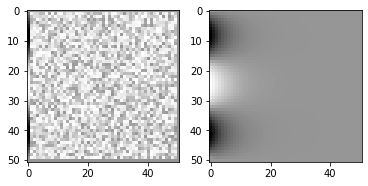

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(Vini, interpolation='nearest', cmap=cm.Greys_r)

ax2 = fig.add_subplot(122)
ax2.imshow(Vlist[-1], interpolation='nearest', cmap=cm.Greys_r)

plt.show()


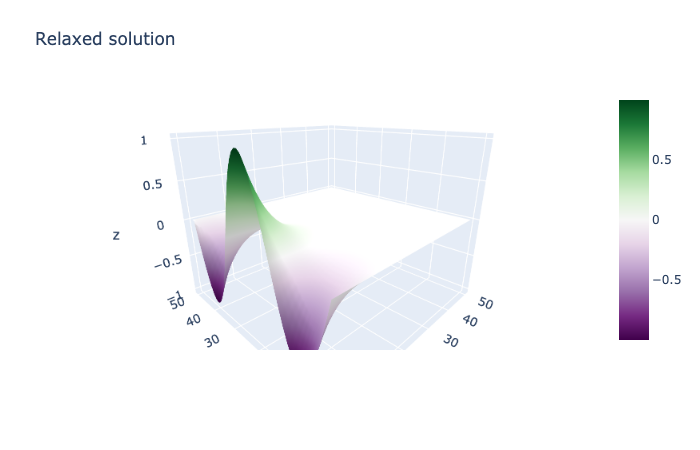

In [28]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z=Vlist[-1],  
                colorscale='PrGN')])
fig.update_layout(title='Relaxed solution', autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=100, t=90),
        scene = {
            'camera_eye': {"x": -1, "y": -1, "z": 0.5},
            "aspectratio": {"x": 1, "y": 1, "z": 0.8}
        })

fig.show(renderer='png') 

_Download this page [as a Jupyter notebook](https://github.com/vuw-scps/python-physics/raw/master/notebooks/phys304/relaxation.ipynb) or as a [standalone Python script](https://github.com/vuw-scps/python-physics/raw/master/scripts/phys304/relaxation.py)._